In [1]:
#import necessary modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'CM Roman'
matplotlib.rcParams['font.size'] = 12

In [2]:
with open("./txt_data/minima_wf_67.txt", "r", encoding="utf-8") as f:
    minimum = f.readlines()

minimum = np.array([float(line.strip()) for line in minimum])
print(f'Number of waveforms: {len(minimum)}')

Number of waveforms: 12044


In [3]:
hist, bin_edges = np.histogram(minimum,bins=100)

centers = (bin_edges[:-1] + bin_edges[1:]) / 2

peaks_indices = find_peaks(hist,width=3)[0]
peaks_values = centers[peaks_indices]

peaks_sum = []
wd = 5
for n in range(len(hist)):
    if n in peaks_indices:
        peaks_sum.append(np.sum(hist[n-wd:n+wd]))

print(f'Probability of 2-1: {peaks_sum[-2]/peaks_sum[-1]:.3f}')
print(f'Probability of 3-1: {peaks_sum[-3]/peaks_sum[-1]:.3f}')
print(f'Probability of 3-2: {peaks_sum[-3]/peaks_sum[-2]:.3f}')

Probability of 2-1: 0.109
Probability of 3-1: 0.016
Probability of 3-2: 0.151


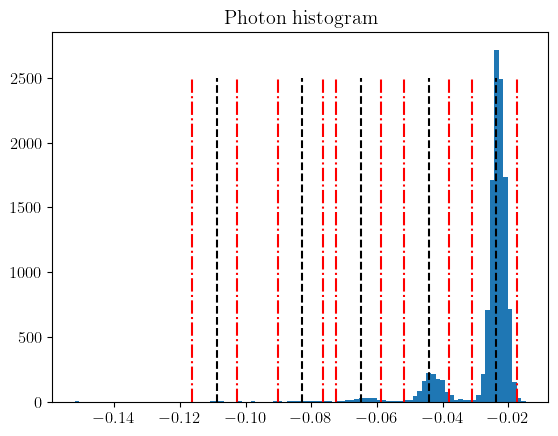

In [4]:
#Figure
fig2, ax2 = plt.subplots()

y_max = 2500

ax2.hist(minimum,bins = 100)
ax2.vlines(peaks_values, 0, y_max, color='k', linestyle='--')
ax2.vlines(bin_edges[peaks_indices-wd], 0, y_max, color='r', linestyles='dashdot')
ax2.vlines(bin_edges[peaks_indices+wd], 0, y_max, color='r', linestyles='dashdot')

ax2.set_title('Photon histogram')
fig2.savefig('../../Images/Photon_Histogram.pdf')